In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
load("../fg1.RData")

In [3]:
fg=fg1

In [4]:
load("../g.RData")

In [5]:
vcount(g)

[1] 197377

In [6]:
cmsize <- sizes(fg)

In [7]:
sort(cmsize)

Community sizes
   31    24    29    30    27    28    23    21    20    26    25    22    13 
    1    12    13    13    14    17    19    21   124   379   429   644   779 
   19    16    15    12    18     1    10    14    17    11     7     5     8 
 1411  1479  2087  3041  3997  4543  5087  5858  5885  6040  6146  7170  8955 
    9     6     3     2     4 
 9294 12494 34796 36140 40489 

In [12]:
ecount(g)

[1] 65933286

In [24]:
library(data.table)
movie_genre = fread("movie_genre_map.txt", sep = "\t", header = FALSE)

In [25]:
head(movie_genre)

V1,V2
185520,Romance
136449,Drama
172809,Short
38195,Romance
174356,Short
87043,Musical


In [26]:
tail(movie_genre)

V1,V2
76869,Musical
46833,Romance
174330,Thriller
30640,Short
149671,Comedy
181920,Thriller


In [27]:
f = c(15520 ,166)

In [28]:
movie_genre$V2[movie_genre$V1 ==166]

[1] "Short"

In [18]:

movie_genre$V2[movie_genre$V1 %in% f ]

[1] "Short"       "Documentary"

In [20]:
typeof(movie_genre)

[1] "list"

In [29]:
genre_list <-unique(sort(movie_genre$V2))

In [30]:
genre_list

[1] "Action"      "Adult"       "Adventure"   "Animation"   "Biography"  
 [6] "Comedy"      "Crime"       "Documentary" "Drama"       "Family"     
[11] "Fantasy"     "Film-Noir"   "Game-Show"   "History"     "Horror"     
[16] "Music"       "Musical"     "Mystery"     "News"        "Reality-TV" 
[21] "Romance"     "Sci-Fi"      "Short"       "Sport"       "Talk-Show"  
[26] "Thriller"    "War"         "Western"

In [31]:
#8a
#Most dominant genre
#
d ={}
max_genre_list<-seq(0,0,31
max_genre <-seq(0,0,31)
genre_list=sort(unique(movie_genre$V2))

for (i in 1:31){
    
    #comm=which(fg$membership==cy[i])
    comm=fg[i]
    cat("*****for ", i,"\n")
    
    d[genre_list]<-as.integer(0)
    f=strtoi(unlist(comm))
    element <- movie_genre[movie_genre$V1 %in% f]
    

    for (j in 1:nrow(element)){
    if(!(is.na(element[j]$V2))){
        

    d[element[j]$V2]<-d[element[j]$V2]+as.integer(1)   
    
    
    } 
    }  
   print(which.max(d))
    print(max(d))
    print(d)
    max_genre_freq[i] <- max(ans)
    max_gf[i] <- which.max(ans)
    
}
    

*****for  1 
Adult 
    2 
[1] 2113
     Action       Adult   Adventure   Animation   Biography      Comedy 
         17        2113          11          23           1         431 
      Crime Documentary       Drama      Family     Fantasy   Film-Noir 
         58          85         327           3          61           0 
  Game-Show     History      Horror       Music     Musical     Mystery 
          0          12         409          18          15          50 
       News  Reality-TV     Romance      Sci-Fi       Short       Sport 
          1           1         101         134         207           7 
  Talk-Show    Thriller         War     Western 
          0         325           9          34 
*****for  2 
Thriller 
      26 
[1] 6695
     Action       Adult   Adventure   Animation   Biography      Comedy 
        854          58         380         257          28        3060 
      Crime Documentary       Drama      Family     Fantasy   Film-Noir 
        493        11

In [34]:
#8b
#finding fraction of movies belonging to each genre in the entire dataset
gen_mov <-{}
gen_mov[genre_list] <- 0
#now loop through entire movie_genre, and increment count
for (j in 1:nrow(movie_genre)){
    gen_mov[movie_genre[j]$V2]<-gen_mov[movie_genre[j]$V2]+as.integer(1)  
    }

In [35]:
gen_mov

Action       Adult   Adventure   Animation   Biography      Comedy 
       4162        2664        2469         397         160       21504 
      Crime Documentary       Drama      Family     Fantasy   Film-Noir 
       3185        2055       45081        3437        2779         222 
  Game-Show     History      Horror       Music     Musical     Mystery 
          7        1706        3781        1451        3550        3036 
       News  Reality-TV     Romance      Sci-Fi       Short       Sport 
         40           9       18523        3635       19978        1668 
  Talk-Show    Thriller         War     Western 
          5       15894        4937        7575

In [36]:
sum(gen_mov)

[1] 173910

In [37]:
#8b
#Most dominant genre
d ={}
max_genre_list<-seq(0,0,31)
max_genre <-seq(0,0,31)
genre_list=sort(unique(movie_genre$V2))
ans <- seq(0,0,length.out=28)
for (k in 1:31){
    comm=fg[k]
    cat("*****for ", k,"\n")
    d[genre_list]<-as.integer(0)
    
    
    f=strtoi(unlist(comm))
    element <- movie_genre[movie_genre$V1 %in% f]
    

    for (j in 1:nrow(element)){
    if(!(is.na(element[j]$V2))){
        

    d[element[j]$V2]<-d[element[j]$V2]+as.integer(1)   
    
    
    } 
    } 
    
    
    ans <- seq(0,0,length.out=28)
    for(i in 1:length(d)){
        #cat("for",d[i],"\n")
        if(d[i]==0)
        next
        
        fraq_g <- as.double(d[i]/sum(d))
        global_g<-as.double(gen_mov[genre_list[i]]/sum(gen_mov))
        #print(gen_mov[genre_list[i]])
        ans[i] <- log(d[i])* as.double(fraq_g/global_g)
        #cat(c_i,"\t",fraq_g,"\t",global_g,"\t",ans[i],"\n")
            print(ans[i])
    }
    max_genre_list[k] <- max(ans)
    max_genre[k] <- which.max(ans)
       #break 

}
        

*****for  1 
[1] 0.4519579
[1] 237.1545
[1] 0.4172282
[1] 7.094392
[1] 0
[1] 4.74832
[1] 2.887778
[1] 7.17664
[1] 1.640218
[1] 0.03745054
[1] 3.524093
[1] 0.6826281
[1] 25.40571
[1] 1.400331
[1] 0.4468806
[1] 2.516179
[1] 0
[1] 0
[1] 0.9827996
[1] 7.051424
[1] 2.157938
[1] 0.3189309
[1] 4.618885
[1] 0.156432
[1] 0.6181514
*****for  2 
[1] 6.819022
[1] 0.4352454
[1] 4.501201
[1] 17.68603
[1] 2.871023
[1] 5.623122
[1] 4.725326
[1] 19.78402
[1] 5.967041
[1] 7.726519
[1] 10.14396
[1] 0.03074464
[1] 7.56136
[1] 3.553936
[1] 13.55028
[1] 14.03171
[1] 1.788331
[1] 6.164321
[1] 12.0195
[1] 1.802977
[1] 5.985766
[1] 18.67738
[1] 10.01988
[1] 14.11664
[1] 5.460249
[1] 18.26908
[1] 4.034787
[1] 1.694715
*****for  3 
[1] 0.5087907
[1] 5.17228
[1] 0
[1] 3.608661
[1] 1.513711
[1] 1.168532
[1] 6.435974
[1] 1.007042
[1] 0.8332717
[1] 26.33011
[1] 1.993514
[1] 1.01186
[1] 3.916995
[1] 5.620296
[1] 9.263071
[1] 0
[1] 7.69062
[1] 2.61332
[1] 25.73497
[1] 7.463288
[1] 2.240192
[1] 6.127531
[1] 32.28363
**

In [38]:
max_genre_list

[1] 237.154488  19.784016  32.283630  15.324164  27.788431  27.100238
 [7]  15.321704  11.237839  12.626807  20.871134  13.744593  13.116309
[13]   9.307087  27.808785  16.343038  32.821243  48.281817  34.801595
[19]  16.247960   7.659954  16.363452  17.327322   7.522897  19.134371
[25]  16.098231 106.229638  22.973194  10.126062   0.000000  19.380442
[31]   0.000000

In [39]:
max_genre

[1]  2  8 28  6  3 10 14 18  9 27 17  6 21 10 17 27  1  3 10  9 24 21 21 23  1
[26] 17 23 23  1 26  1

In [42]:
genre_list[max_genre]

[1] "Adult"       "Documentary" "Western"     "Comedy"      "Adventure"  
 [6] "Family"      "History"     "Mystery"     "Drama"       "War"        
[11] "Musical"     "Comedy"      "Romance"     "Family"      "Musical"    
[16] "War"         "Action"      "Adventure"   "Family"      "Drama"      
[21] "Sport"       "Romance"     "Romance"     "Short"       "Action"     
[26] "Musical"     "Short"       "Short"       "Action"      "Thriller"   
[31] "Action"

In [83]:
max_genre_list

[1] 7.054053 8.867411 9.037395 9.003338 7.692554 7.829702 7.194227 7.918364
 [9] 7.510335 7.529112 7.588855 6.563799 5.512900 7.296471 6.306315 6.180667
[17] 7.073804 6.884703 5.371570 1.944705 0.000000 4.108358 0.000000 6.029522
[25] 5.426900 5.159609 0.000000 0.000000 2.448240 2.448240 0.000000

In [84]:
max_genre

[1]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  1 21  1 22 27
[26] 26  1  1 28 28  1

In [22]:
nodeset1=which(fg$membership==30)

In [23]:
nodeset1

[1] 115227 115228 115229 115230 115231 115232 115233 115234 115235 115236
[11] 115237 115238 115239

In [174]:
#Processing of getting movie to actor map is done in python
#reading the file in R storing it
library(data.table)
movie_actor_map = fread("bip.txt", sep = "\t", header = FALSE)

In [175]:
nodeset1 <- unique(movie_actor_map$V1)

In [176]:
nodeset2 <- unique(movie_actor_map$V2)

In [177]:
x<-unique(nodeset2)

In [178]:
length(x)

[1] 17

In [179]:
length(nodeset1)

[1] 12

In [180]:
nodeset1

[1] "M1"  "M2"  "M3"  "M4"  "M5"  "M6"  "M7"  "M8"  "M9"  "M10" "M11" "M12"

In [181]:
x

[1] "A1101"  "A1102"  "A1103"  "A1104"  "A1105"  "A1106"  "A1107"  "AA1116"
 [9] "AA1117" "A1108"  "A1109"  "1A110"  "A1111"  "A1112"  "A1113"  "A1114" 
[17] "A1115"

In [186]:
all_actors={}
all_actors[nodeset2]<-as.integer(0)
    #element <-movie_genre[comm]
    
for (i in movie_actor_map$V2){
    all_actors[nodeset2]$v2<-all_actors[nodeset2]$v2+as.integer(1)   
}

ERROR: Error: $ operator is invalid for atomic vectors


[1] TRUE

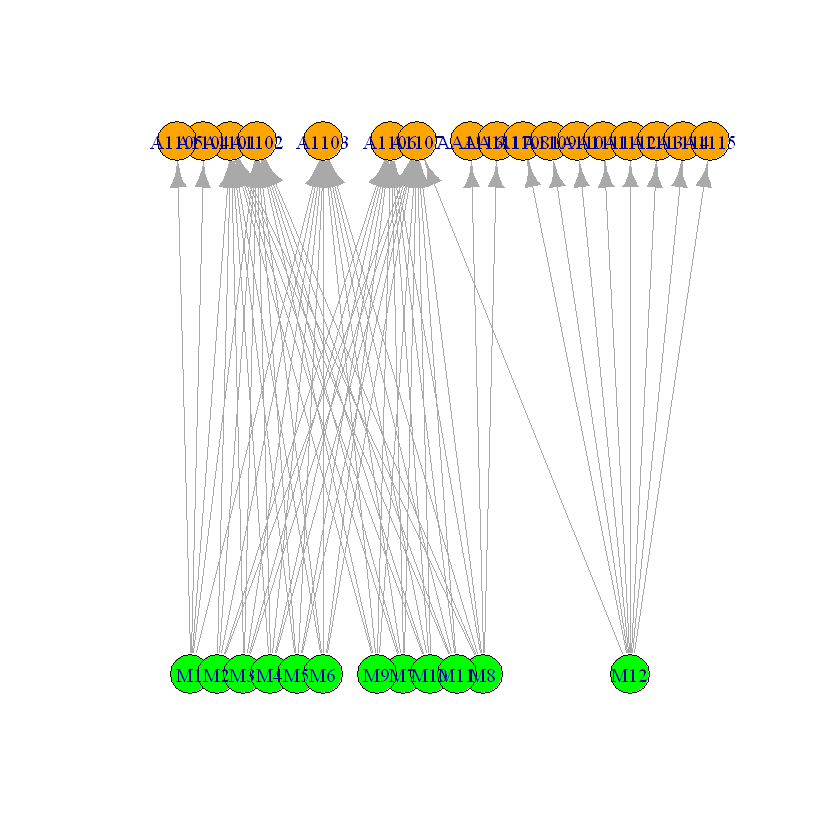

In [182]:
#8c
#now removing the vertex names
#trying to follow the example given here : https://stackoverflow.com/questions/28874028/creating-a-bipartite-graph-in-r-with-igraph-with-specific-edge-list
bg<-graph.empty()
bg <- add.vertices(bg,nv=length(nodeset1),attr=list(name=paste0(nodeset1),
                                          type=rep(TRUE,length(nodeset1))))
bg <- add.vertices(bg,nv=length(nodeset2),attr=list(name=paste0(nodeset2),
                                type=rep(FALSE,length(nodeset2))))

# we need to turn edgeList into a vector (and using names instead of indexes)
edgeListVec <- as.vector(t(as.matrix(data.frame(S1=paste0(movie_actor_map$V1),
                             S2=paste0(movie_actor_map$V2)))))
bg <- add.edges(bg,edgeListVec)

# check if is recognized as bipartite
is.bipartite(bg)

# let's plot it !
plot.igraph(bg,layout=layout.bipartite, vertex.color=c("orange","green")[V(bg)$type+1])

In [189]:
comm=which(fg$membership==24)

In [238]:
strtoi(unlist(fg[30]))

[1]    431  48206  31587   8274 132345 175148  90061 187991 148813 112706
[11] 110094  24320  99326

In [190]:
comm

[1]  71393  71394  71395  71397  71398  71400  71402  71404  71406  71410
[11]  71411 196433

In [192]:
load("moviemap.RData")

In [194]:
moviemap[0]

named list()

In [195]:
for(i in fg[24])
    print(moviemap[i])

$`166`
[1] "2LiveCrew:TakeItOff(2014)"

$`26977`
[1] "2LiveCrew:MeSoHorny(1989)"

$`160348`
[1] "2LiveCrew:PopthePussy(1991)"

$`64614`
[1] "LukeFeat.2LiveCrew:MamaJuanita(1990)"

$`62743`
[1] "LukeFeat.2LiveCrew:DotheBart(1990)"

$`182502`
[1] "LukeFeat.2LiveCrew:BannedintheU.S.A.(1990)"

$`107162`
[1] "2LiveCrew:DoWahDiddyDiddy(1988)"

$`143697`
[1] "2LiveCrew:YaketyYak(1988)"

$`48972`
[1] "2LiveCrew:MoveSomethin(1988)"

$`88016`
[1] "2LiveCrew:The2LiveCrewMegaMix(1992)"

$`75646`
[1] "2LiveCrew:CmonBabe(1990)"

$`103297`
[1] "808(2015)"



In [244]:
c<-strtoi(fg[[24]])

In [245]:
c

[1]    166  26977 160348  64614  62743 182502 107162 143697  48972  88016
[11]  75646 103297

In [229]:
for(i in length(1:c)){
    print(p)
}

ERROR: Error in 1:c: NA/NaN argument


In [224]:
typeof(unlist(c))

[1] "character"

In [205]:
comm=fg[1]

In [206]:
typeof(comm)

[1] "list"

In [207]:
comm

$`1`
   [1] "165777" "167352" "175076" "9994"   "178044" "74627"  "167649" "70940" 
   [9] "134755" "41774"  "143613" "68191"  "131707" "71859"  "37834"  "192684"
  [17] "34946"  "107623" "85054"  "28129"  "6395"   "29858"  "102993" "181955"
  [25] "152885" "191309" "34610"  "93101"  "41814"  "134480" "128673" "54867" 
  [33] "524"    "5847"   "31416"  "79411"  "24983"  "8356"   "176573" "153152"
  [41] "2751"   "103275" "52578"  "54065"  "145335" "155731" "179815" "137401"
  [49] "53605"  "116372" "138875" "152263" "39566"  "34340"  "34"     "129761"
  [57] "116823" "70509"  "116036" "66390"  "174775" "170997" "37135"  "89950" 
  [65] "15422"  "194450" "102420" "186461" "153624" "116220" "146600" "175872"
  [73] "98595"  "107239" "46748"  "147013" "186871" "167793" "155280" "26070" 
  [81] "139931" "142654" "17502"  "84943"  "17100"  "92979"  "8927"   "56524" 
  [89] "146641" "91391"  "18489"  "39592"  "6230"   "19522"  "185393" "44413" 
  [97] "1981"   "64833"  "77006"  "7982"   "116471" "193848" "52913"  "191051"
 [105] "157907" "53584"  "35423"  "44801"  "170652" "58040"  "173579" "189776"
 [113] "127567" "196180" "183430" "80714"  "99669"  "122766" "109314" "148071"
 [121] "175457" "124165" "124007" "9546"   "181292" "75557"  "161430" "122422"
 [129] "167125" "182843" "139943" "114752" "26078"  "134544" "133414" "17439" 
 [137] "169713" "914"    "12860"  "192987" "28045"  "176627" "148659" "95340" 
 [145] "105359" "155228" "50410"  "23791"  "165794" "53943"  "192609" "47050" 
 [153] "76910"  "79393"  "147927" "150992" "10923"  "158539" "136008" "3307"  
 [161] "182088" "91554"  "70319"  "20201"  "68866"  "39225"  "69490"  "20203" 
 [169] "4219"   "192159" "46227"  "119931" "181492" "35057"  "33069"  "156876"
 [177] "87214"  "125555" "163769" "106069" "178418" "64446"  "14337"  "182135"
 [185] "155008" "35957"  "19596"  "76944"  "79595"  "41432"  "29394"  "189682"
 [193] "148911" "150742" "66319"  "30241"  "136575" "103914" "50279"  "4365"  
 [201] "121494" "174867" "74919"  "115523" "130724" "190522" "136931" "190281"
 [209] "174698" "180018" "72228"  "155493" "59333"  "119235" "117657" "25574" 
 [217] "120390" "135131" "183487" "57257"  "24393"  "125866" "148500" "136704"
 [225] "144322" "102522" "14990"  "9684"   "196567" "40648"  "176764" "182407"
 [233] "139482" "146751" "123887" "150839" "87601"  "157234" "16302"  "67036" 
 [241] "130404" "15518"  "152207" "168841" "176388" "183488" "175664" "183166"
 [249] "144913" "84159"  "36434"  "96770"  "164796" "11253"  "52195"  "186669"
 [257] "84950"  "26637"  "71138"  "14687"  "67652"  "83603"  "90030"  "41732" 
 [265] "153924" "140920" "106851" "132731" "168156" "123843" "24673"  "47585" 
 [273] "3219"   "132518" "53675"  "185311" "171514" "54477"  "133696" "124061"
 [281] "106036" "195427" "184637" "89122"  "85735"  "32416"  "98012"  "86315" 
 [289] "127761" "75267"  "180924" "162332" "175000" "11896"  "226"    "163877"
 [297] "31379"  "78444"  "15500"  "138316" "57767"  "168083" "142822" "4197"  
 [305] "173425" "148428" "11396"  "160311" "130634" "182338" "179059" "58087" 
 [313] "177187" "67164"  "42483"  "53291"  "173589" "185333" "15538"  "169556"
 [321] "168013" "170261" "14527"  "117704" "192465" "179511" "86222"  "164839"
 [329] "137940" "140585" "109193" "174309" "187444" "16604"  "145836" "135763"
 [337] "107430" "99619"  "143487" "41512"  "130881" "11788"  "66823"  "104820"
 [345] "105902" "139218" "44831"  "125197" "4536"   "197309" "152067" "74920" 
 [353] "56273"  "181454" "90245"  "81091"  "68760"  "119669" "172384" "190204"
 [361] "40203"  "135744" "27183"  "175906" "94895"  "21744"  "77473"  "177904"
 [369] "139018" "81454"  "62471"  "164685" "132672" "85714"  "150688" "63048" 
 [377] "162985" "91514"  "21842"  "68091"  "98997"  "6437"   "96463"  "171581"
 [385] "132746" "160103" "62077"  "78118"  "165477" "155472" "94165"  "159216"
 [393] "10281"  "46558"  "128688" "142348" "136059" "158244" "128267" "87148" 
 [401] "166929" "144728" "175811" "98864"  "1

In [211]:
movie_genre[165777]

V1,V2
68051,Family


In [220]:
movie_genre[c]

ERROR: Error in `[.data.table`(movie_genre, c): When i is a data.table (or character vector), the columns to join by must be specified either using 'on=' argument (see ?data.table) or by keying x (i.e. sorted, and, marked as sorted, see ?setkey). Keyed joins might have further speed benefits on very large data due to x being sorted in RAM.


In [213]:
p=unlist(comm)

In [221]:
p

11       12       13       14       15       16       17       18 
"165777" "167352" "175076"   "9994" "178044"  "74627" "167649"  "70940" 
      19      110      111      112      113      114      115      116 
"134755"  "41774" "143613"  "68191" "131707"  "71859"  "37834" "192684" 
     117      118      119      120      121      122      123      124 
 "34946" "107623"  "85054"  "28129"   "6395"  "29858" "102993" "181955" 
     125      126      127      128      129      130      131      132 
"152885" "191309"  "34610"  "93101"  "41814" "134480" "128673"  "54867" 
     133      134      135      136      137      138      139      140 
   "524"   "5847"  "31416"  "79411"  "24983"   "8356" "176573" "153152" 
     141      142      143      144      145      146      147      148 
  "2751" "103275"  "52578"  "54065" "145335" "155731" "179815" "137401" 
     149      150      151      152      153      154      155      156 
 "53605" "116372" "138875" "152263"  "39566"  "34340"     "34" "129761" 
     157      158      159      160      161      162      163      164 
"116823"  "70509" "116036"  "66390" "174775" "170997"  "37135"  "89950" 
     165      166      167      168      169      170      171      172 
 "15422" "194450" "102420" "186461" "153624" "116220" "146600" "175872" 
     173      174      175      176      177      178      179      180 
 "98595" "107239"  "46748" "147013" "186871" "167793" "155280"  "26070" 
     181      182      183      184      185      186      187      188 
"139931" "142654"  "17502"  "84943"  "17100"  "92979"   "8927"  "56524" 
     189      190      191      192      193      194      195      196 
"146641"  "91391"  "18489"  "39592"   "6230"  "19522" "185393"  "44413" 
     197      198      199     1100     1101     1102     1103     1104 
  "1981"  "64833"  "77006"   "7982" "116471" "193848"  "52913" "191051" 
    1105     1106     1107     1108     1109     1110     1111     1112 
"157907"  "53584"  "35423"  "44801" "170652"  "58040" "173579" "189776" 
    1113     1114     1115     1116     1117     1118     1119     1120 
"127567" "196180" "183430"  "80714"  "99669" "122766" "109314" "148071" 
    1121     1122     1123     1124     1125     1126     1127     1128 
"175457" "124165" "124007"   "9546" "181292"  "75557" "161430" "122422" 
    1129     1130     1131     1132     1133     1134     1135     1136 
"167125" "182843" "139943" "114752"  "26078" "134544" "133414"  "17439" 
    1137     1138     1139     1140     1141     1142     1143     1144 
"169713"    "914"  "12860" "192987"  "28045" "176627" "148659"  "95340" 
    1145     1146     1147     1148     1149     1150     1151     1152 
"105359" "155228"  "50410"  "23791" "165794"  "53943" "192609"  "47050" 
    1153     1154     1155     1156     1157     1158     1159     1160 
 "76910"  "79393" "147927" "150992"  "10923" "158539" "136008"   "3307" 
    1161     1162     1163     1164     1165     1166     1167     1168 
"182088"  "91554"  "70319"  "20201"  "68866"  "39225"  "69490"  "20203" 
    1169     1170     1171     1172     1173     1174     1175     1176 
  "4219" "192159"  "46227" "119931" "181492"  "35057"  "33069" "156876" 
    1177     1178     1179     1180     1181     1182     1183     1184 
 "87214" "125555" "163769" "106069" "178418"  "64446"  "14337" "182135" 
    1185     1186     1187     1188     1189     1190     1191     1192 
"155008"  "35957"  "19596"  "76944"  "79595"  "41432"  "29394" "189682" 
    1193     1194     1195     1196     1197     1198     1199     1200 
"148911" "150742"  "66319"  "30241" "136575" "103914"  "50279"   "4365" 
    1201     1202     1203     1204     1205     1206     1207     1208 
"121494" "174867"  "74919" "115523" "130724" "190522" "136931" "190281" 
    1209     1210     1211     1212     1213     1214     1215     1216 
"174698" "180018"  "72228" "155493"  "59333" "119235" "117657"  "25574" 
    1217     1218     1219     1220     1221     1222     1223  

In [218]:
comm[1]

$`1`
   [1] "165777" "167352" "175076" "9994"   "178044" "74627"  "167649" "70940" 
   [9] "134755" "41774"  "143613" "68191"  "131707" "71859"  "37834"  "192684"
  [17] "34946"  "107623" "85054"  "28129"  "6395"   "29858"  "102993" "181955"
  [25] "152885" "191309" "34610"  "93101"  "41814"  "134480" "128673" "54867" 
  [33] "524"    "5847"   "31416"  "79411"  "24983"  "8356"   "176573" "153152"
  [41] "2751"   "103275" "52578"  "54065"  "145335" "155731" "179815" "137401"
  [49] "53605"  "116372" "138875" "152263" "39566"  "34340"  "34"     "129761"
  [57] "116823" "70509"  "116036" "66390"  "174775" "170997" "37135"  "89950" 
  [65] "15422"  "194450" "102420" "186461" "153624" "116220" "146600" "175872"
  [73] "98595"  "107239" "46748"  "147013" "186871" "167793" "155280" "26070" 
  [81] "139931" "142654" "17502"  "84943"  "17100"  "92979"  "8927"   "56524" 
  [89] "146641" "91391"  "18489"  "39592"  "6230"   "19522"  "185393" "44413" 
  [97] "1981"   "64833"  "77006"  "7982"   "116471" "193848" "52913"  "191051"
 [105] "157907" "53584"  "35423"  "44801"  "170652" "58040"  "173579" "189776"
 [113] "127567" "196180" "183430" "80714"  "99669"  "122766" "109314" "148071"
 [121] "175457" "124165" "124007" "9546"   "181292" "75557"  "161430" "122422"
 [129] "167125" "182843" "139943" "114752" "26078"  "134544" "133414" "17439" 
 [137] "169713" "914"    "12860"  "192987" "28045"  "176627" "148659" "95340" 
 [145] "105359" "155228" "50410"  "23791"  "165794" "53943"  "192609" "47050" 
 [153] "76910"  "79393"  "147927" "150992" "10923"  "158539" "136008" "3307"  
 [161] "182088" "91554"  "70319"  "20201"  "68866"  "39225"  "69490"  "20203" 
 [169] "4219"   "192159" "46227"  "119931" "181492" "35057"  "33069"  "156876"
 [177] "87214"  "125555" "163769" "106069" "178418" "64446"  "14337"  "182135"
 [185] "155008" "35957"  "19596"  "76944"  "79595"  "41432"  "29394"  "189682"
 [193] "148911" "150742" "66319"  "30241"  "136575" "103914" "50279"  "4365"  
 [201] "121494" "174867" "74919"  "115523" "130724" "190522" "136931" "190281"
 [209] "174698" "180018" "72228"  "155493" "59333"  "119235" "117657" "25574" 
 [217] "120390" "135131" "183487" "57257"  "24393"  "125866" "148500" "136704"
 [225] "144322" "102522" "14990"  "9684"   "196567" "40648"  "176764" "182407"
 [233] "139482" "146751" "123887" "150839" "87601"  "157234" "16302"  "67036" 
 [241] "130404" "15518"  "152207" "168841" "176388" "183488" "175664" "183166"
 [249] "144913" "84159"  "36434"  "96770"  "164796" "11253"  "52195"  "186669"
 [257] "84950"  "26637"  "71138"  "14687"  "67652"  "83603"  "90030"  "41732" 
 [265] "153924" "140920" "106851" "132731" "168156" "123843" "24673"  "47585" 
 [273] "3219"   "132518" "53675"  "185311" "171514" "54477"  "133696" "124061"
 [281] "106036" "195427" "184637" "89122"  "85735"  "32416"  "98012"  "86315" 
 [289] "127761" "75267"  "180924" "162332" "175000" "11896"  "226"    "163877"
 [297] "31379"  "78444"  "15500"  "138316" "57767"  "168083" "142822" "4197"  
 [305] "173425" "148428" "11396"  "160311" "130634" "182338" "179059" "58087" 
 [313] "177187" "67164"  "42483"  "53291"  "173589" "185333" "15538"  "169556"
 [321] "168013" "170261" "14527"  "117704" "192465" "179511" "86222"  "164839"
 [329] "137940" "140585" "109193" "174309" "187444" "16604"  "145836" "135763"
 [337] "107430" "99619"  "143487" "41512"  "130881" "11788"  "66823"  "104820"
 [345] "105902" "139218" "44831"  "125197" "4536"   "197309" "152067" "74920" 
 [353] "56273"  "181454" "90245"  "81091"  "68760"  "119669" "172384" "190204"
 [361] "40203"  "135744" "27183"  "175906" "94895"  "21744"  "77473"  "177904"
 [369] "139018" "81454"  "62471"  "164685" "132672" "85714"  "150688" "63048" 
 [377] "162985" "91514"  "21842"  "68091"  "98997"  "6437"   "96463"  "171581"
 [385] "132746" "160103" "62077"  "78118"  "165477" "155472" "94165"  "159216"
 [393] "10281"  "46558"  "128688" "142348" "136059" "158244" "128267" "87148" 
 [401] "166929" "144728" "175811" "98864"  "1

In [55]:
comm=fg[[24]]

In [56]:
strtoi(comm)

[1]    166  26977 160348  64614  62743 182502 107162 143697  48972  88016
[11]  75646 103297

In [276]:
movie_genre[strtoi(comm)]

V1,V2
35525,Romance
116089,Fantasy
179990,Sci-Fi
154419,Drama
80639,Musical
NA,NA
11169,Romance
1587,Drama
29957,Western
135452,Mystery


In [278]:
movie_genre$V1==166

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [279]:
if(movie_genre$V1==166){
    print(movie_genre$V2)
}

Warning message in if (movie_genre$V1 == 166) {:
"the condition has length > 1 and only the first element will be used"

In [59]:
unique(max_genre)

[1]  2  8 28  6  3 10 14 18  9 27 17 21  1 24 23 26